### I: Data Collection using Mediapipe

In this notebook, I will be collecting body part (landmark) data points from training photos and videos. This will be achieved using Mediapipe, which is an open-source framework that provides Machine Learning solutions for computer vision tasks. I will be using the `Pose` module, which can estimate positions of key body parts in images and videos.

In [1]:
# import libraries
import cv2
import mediapipe as mp

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
import glob
import os.path


good_dir = 'D:/capstone-running-form/data/good_pose/'
good_files = glob.glob(os.path.join(good_dir, '*.mp4')) + glob.glob(os.path.join(good_dir, '*.jpeg'))
print(good_files)


bad_dir = 'D:/capstone-running-form/data/bad_pose/'
bad_files = glob.glob(os.path.join(bad_dir, '*.mp4')) + glob.glob(os.path.join(bad_dir, '*.jpeg'))
print(bad_files)

['D:/capstone-running-form/data/good_pose\\good-video-3.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-4.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-5.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-6.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-7.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-8.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-9.mp4', 'D:/capstone-running-form/data/good_pose\\sample-running-good-1.mp4', 'D:/capstone-running-form/data/good_pose\\sample-running-good-2.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-10.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-11.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-12.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-13.mp4', 'D:/capstone-running-form/data/good_pose\\good-video-14.mp4', 'D:/capstone-running-form/data/good_pose\\good-1.jpeg', 'D:/capstone-running-form/data/good_pose\\good-2.jpeg']
['D:/capst

### Data Processing <br>
Process the train videos and images using `mediapipe` by passing the RGB frames using the `holistic.process`. The documentation can be found here [**link**](https://google.github.io/mediapipe/solutions/pose). The output of this data collection will be the coordinates of human body landmarks. Then we can find the angles between specific human body landmarks to determine what is optimal for a good posture.

Pose Landmarker: <br><br><img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [4]:
for video_path in good_files:
    
    print(video_path)

    cap = cv2.VideoCapture(video_path)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        while cap.isOpened():
            ret, frame = cap.read()
            if ret:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                results = holistic.process(image)
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

                cv2.imshow('Raw Webcam Feed', image)
            else:
                break

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
    print("exit")
    cap.release()
    cv2.destroyAllWindows()
    for i in range (1,5):
        cv2.waitKey(1)
    print("closed")

D:/capstone-running-form/data/good_pose\good-video-3.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-4.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-5.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-6.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-7.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-8.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-9.mp4
exit
closed
D:/capstone-running-form/data/good_pose\sample-running-good-1.mp4
exit
closed
D:/capstone-running-form/data/good_pose\sample-running-good-2.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-10.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-11.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-12.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-13.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-14.mp4
exit
closed
D:/capstone

In [5]:
len(results.pose_landmarks.landmark)

33

In [7]:
### Mediapipe Landamrk Coordinates

num_coords = len(results.pose_landmarks.landmark)
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

#### 1.1 Collecting Data for Good Poses

In [8]:
with open('Pose_keypoints_good.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [9]:
class_name = 'Good'

In [10]:
for video_path in good_files:
    
    print(video_path)
    #Video Feed

    # Setting up video capture device
    # 0 = built-in webcam & 2 = External webcam
    # If want to grab a video clip, type the name of video and its file loc within (...)

    cap = cv2.VideoCapture(video_path)

    # Start the holistic model
    # 'Holistic' allows me to access the Holistic estimation model
    # '0.6' = 60%

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        while cap.isOpened():
            ret, frame = cap.read()
#             print(ret)
            if ret == False:
                break
             #recoloring it back to BGR b/c it will rerender back to opencv
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = holistic.process(image)

            #setting image writeable back to true to be able process it
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            #Draw the pose landmarks
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

            try:

                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

                row = pose_row
                row.insert(0, class_name)

                # data is appended to csv. if csv does not exist, new file is created
                with open('Pose_keypoints_good.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

            except:
                pass
#                print("reaches here")
            cv2.imshow('Training Data Feed', image)
            
            


            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    print("exit")
    cap.release()
    cv2.destroyAllWindows()
    for i in range (1,5):
        cv2.waitKey(1)
    print("closed")

D:/capstone-running-form/data/good_pose\good-video-3.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-4.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-5.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-6.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-7.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-8.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-9.mp4
exit
closed
D:/capstone-running-form/data/good_pose\sample-running-good-1.mp4
exit
closed
D:/capstone-running-form/data/good_pose\sample-running-good-2.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-10.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-11.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-12.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-13.mp4
exit
closed
D:/capstone-running-form/data/good_pose\good-video-14.mp4
exit
closed
D:/capstone

In [11]:
df_good = pd.read_csv('Pose_keypoints_good.csv')
print(df_good.shape)
df_good.head()

(4075, 133)


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Good,0.427481,0.432218,0.187747,0.999349,0.433324,0.424074,0.148867,0.998281,0.434497,...,0.229658,0.889561,0.670334,0.664551,-0.064846,0.988610,0.474645,0.799503,0.198858,0.913017
1,Good,0.427867,0.424335,0.103592,0.999405,0.435398,0.416132,0.074502,0.998436,0.436960,...,0.171699,0.896321,0.646353,0.702969,-0.049465,0.989388,0.574099,0.800178,0.147779,0.918380
2,Good,0.437734,0.413582,0.081666,0.999456,0.443536,0.406205,0.056616,0.998587,0.445162,...,-0.332621,0.904731,0.526356,0.725758,-0.026678,0.989607,0.674077,0.800791,-0.391390,0.925486
3,Good,0.441794,0.404654,0.074183,0.999448,0.448542,0.397865,0.044298,0.998694,0.450451,...,-0.278002,0.912920,0.418003,0.741679,0.014452,0.988432,0.749979,0.780808,-0.335191,0.931552
4,Good,0.444895,0.399103,0.001690,0.999498,0.451033,0.391476,-0.031034,0.998821,0.452720,...,-0.054553,0.921146,0.319029,0.749560,-0.108193,0.988595,0.825690,0.735513,-0.097319,0.937508


#### 1.2 Collecting Data for Bad Poses

In [12]:
with open('Pose_keypoints_bad.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [13]:
class_name = 'Bad' 

In [14]:
for video_path in bad_files:
    
    print(video_path)
    #Video Feed

    # Setting up video capture device
    # 0 = built-in webcam & 2 = External webcam
    # If want to grab a video clip, type the name of video and its file loc within (...)

    cap = cv2.VideoCapture(video_path)

    # Start the holistic model
    # 'Holistic' allows me to access the Holistic estimation model
    # '0.6' = 60%

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        while cap.isOpened():
            ret, frame = cap.read()
#             print(ret)
            if ret == False:
                break
             #recoloring it back to BGR b/c it will rerender back to opencv
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = holistic.process(image)

            #setting image writeable back to true to be able process it
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            #Draw the pose landmarks
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

            try:

                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

                row = pose_row
                row.insert(0, class_name)

                # data is appended to csv. if csv does not exist, new file is created
                with open('Pose_keypoints_bad.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

            except:
                pass
#                print("reaches here")
            cv2.imshow('Training Data Feed', image)
            
            


            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    print("exit")
    cap.release()
    cv2.destroyAllWindows()
    for i in range (1,5):
        cv2.waitKey(1)
    print("closed")

D:/capstone-running-form/data/bad_pose\video11.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video10.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\bad-arch-1.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video6.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video7.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video5.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video4.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video1.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video3.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video2.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video9.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\bad-slouch-1.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\video8.mp4
exit
closed
D:/capstone-running-form/data/bad_pose\bad-1.jpeg
exit
closed


In [15]:
df_bad = pd.read_csv('Pose_keypoints_bad.csv')
print(df_bad.shape)
df_bad.head()

(4294, 133)


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Bad,0.597514,0.330045,-0.046739,0.999786,0.595233,0.314657,-0.039935,0.999435,0.594381,...,-0.016369,0.986479,0.542886,0.811219,0.140850,0.936010,0.519139,0.821335,-0.042727,0.995285
1,Bad,0.603381,0.325570,-0.049170,0.999806,0.601188,0.310604,-0.040726,0.999489,0.600242,...,-0.024023,0.985957,0.541942,0.809034,0.138972,0.930692,0.536733,0.821338,-0.048026,0.994957
2,Bad,0.614878,0.315903,-0.031407,0.999825,0.613352,0.302009,-0.020730,0.999540,0.612598,...,-0.022843,0.986882,0.542489,0.811047,0.129956,0.932926,0.563722,0.822904,-0.049756,0.995270
3,Bad,0.624886,0.308227,-0.035477,0.999842,0.623481,0.295145,-0.026631,0.999585,0.622720,...,-0.008451,0.987635,0.539751,0.811104,0.098917,0.936107,0.592707,0.822877,-0.048756,0.995534
4,Bad,0.636889,0.295799,-0.043732,0.999856,0.634686,0.282637,-0.032385,0.999624,0.634024,...,-0.005093,0.988365,0.539935,0.810745,0.093304,0.938698,0.613125,0.822549,-0.048148,0.995753


#### 1.3 Joining both Datasets

In [16]:
df = pd.concat([df_bad,df_good], ignore_index = True)
print(df.shape)

(8369, 133)


In [17]:
df["class"].value_counts()

class
Bad     4294
Good    4075
Name: count, dtype: int64

#### 1.4 Check if train dataset is balanced across both classes

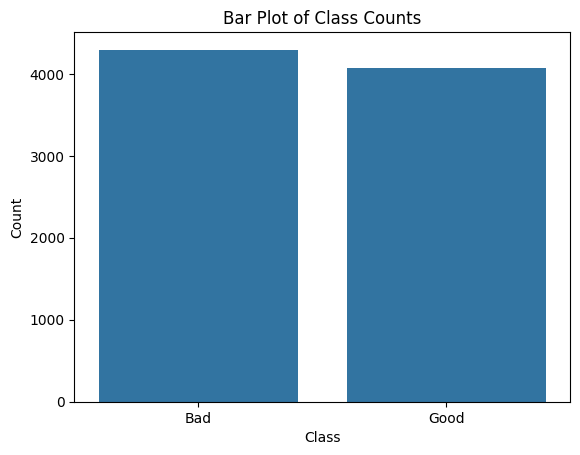

In [18]:
sns.barplot(x=df["class"].value_counts().index, y=df["class"].value_counts())

# Optionally, you can add labels and a title to the plot
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Bar Plot of Class Counts")

# Display the plot
plt.show()



Dataset is pretty well balanced as there are roughly equal counts of frames with good and bad postures.

In [19]:
df.describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,...,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.489351,0.310098,-0.103770,0.998563,0.489274,0.282535,-0.104224,0.998526,0.490194,0.280996,...,0.121679,0.598976,0.520475,1.146601,0.134439,0.518633,0.502951,1.192496,0.073281,0.578577
std,0.111519,0.114437,0.123013,0.006828,0.112920,0.109781,0.118392,0.006162,0.113140,0.109290,...,0.172743,0.381817,0.138632,0.451344,0.249888,0.430155,0.139357,0.467792,0.178820,0.403555
min,-0.020505,-0.108444,-0.652493,0.805949,-0.013616,-0.126093,-0.640026,0.826938,-0.013492,-0.125314,...,-0.397642,0.000294,0.000066,0.174037,-0.656764,0.000222,-0.000393,0.277891,-0.475098,0.000346
25%,0.440504,0.218740,-0.170203,0.999470,0.440400,0.199861,-0.173875,0.999376,0.438440,0.199358,...,-0.009276,0.221141,0.445613,0.827565,-0.063193,0.086904,0.409352,0.839117,-0.072811,0.133204
50%,0.486084,0.347536,-0.092988,0.999818,0.483611,0.310313,-0.091452,0.999781,0.485254,0.308803,...,0.097537,0.783893,0.524063,0.936583,0.134392,0.458614,0.509248,0.962796,0.072277,0.706215
75%,0.539146,0.387306,-0.032474,0.999940,0.539671,0.354050,-0.028098,0.999933,0.544214,0.351431,...,0.226344,0.954697,0.607728,1.407454,0.315183,0.960441,0.588289,1.512669,0.199993,0.967417
max,1.039752,0.867214,0.587195,1.000000,1.036630,0.864411,0.540488,0.999999,1.035088,0.864875,...,0.805387,0.992624,1.015766,2.430448,0.906308,0.999240,1.037150,2.543757,0.817636,0.996433


Visibility of Landmarks

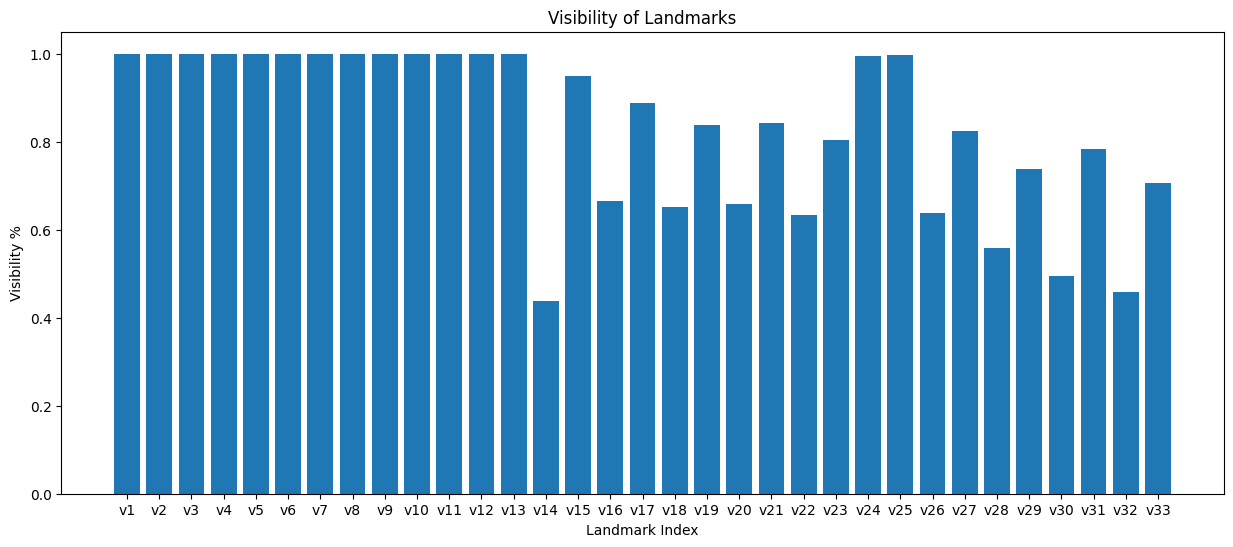

In [20]:
# Bar chart for visibility of landmarks
visibility_columns = df.filter(regex='^v', axis=1)
visibility_counts = visibility_columns.median()
plt.figure(figsize=(15, 6))
plt.bar(visibility_counts.index, visibility_counts.values)
plt.xlabel('Landmark Index')
plt.ylabel('Visibility %')
plt.title('Visibility of Landmarks')


plt.show()

There are some landmarks that are not as visible as the others, like point 14, 28, 30 and 32. Points 27 to 33 represent the lower limbs of a human body (ankle downwards), hence is not a concern in posture analysis.